# Measuring the overlap of quantum states

This notebook gives three circuits for measuing the overlap of quantum states as explained Chapter Three of the book Machine Learning with Quantum Computers by Schuld and Petruccione.  

Implement modules needed

In [ ]:
from pathlib import Path
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

HOME_DIR = '..'
BASE_DIR = Path(HOME_DIR)

import sys
sys.path.append(HOME_DIR)

from src.modules.quantum_helper_functions import (generate_random_state,
                                                  calculate_overlap_from_states,
                                                  calculate_overlap_from_measurement,
                                                 )

Define constants, and initialise the random numbers

In [2]:
SHOTS = 10_000
TOLERANCE = 1e-3

np.random.seed(42)

Define wires

In [3]:
my_wires = ['Ancilla', 'a', 'b',]
qubits = len(my_wires)
dev = qml.device('default.qubit', wires=my_wires,)

In [4]:
vec_a = generate_random_state()
vec_b = generate_random_state()

In [5]:
@qml.qnode(dev, shots = SHOTS)
def circuit():
    """Simple Overlap Circuit"""
    qml.StatePrep(vec_a, wires='a')
    qml.StatePrep(vec_b, wires='b') 
    qml.StatePrep([1,0], wires='Ancilla')
    qml.Hadamard(wires='Ancilla')
    qml.CSWAP(wires=['Ancilla','a', 'b'])
    qml.Hadamard(wires='Ancilla')
    return qml.sample(wires='Ancilla')

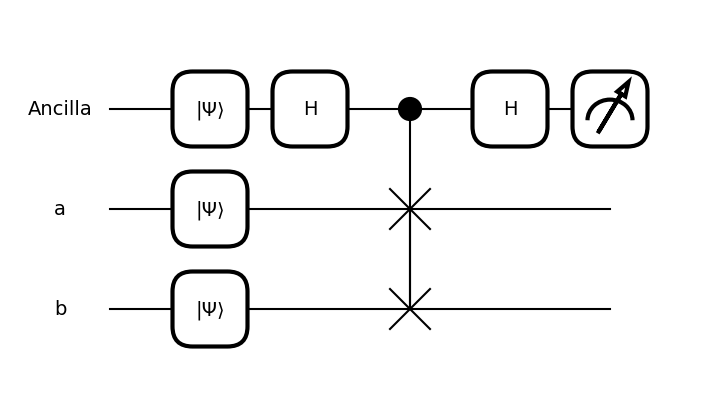

In [6]:
fig = qml.draw_mpl(circuit)()

In [7]:
measurements = circuit()
measurement_avg = np.mean(measurements)
print(f"Measurement average: {measurement_avg:.4f}")


Measurement average: 0.4322


In [8]:
print(f'The calculated overlap from measurement is: {calculate_overlap_from_measurement(measurement_avg):.5f}')
print(f'The calculated overlap from the states is: {calculate_overlap_from_states(vec_a, vec_b):.5f}')
delta = abs(calculate_overlap_from_states(vec_a, vec_b) - calculate_overlap_from_measurement(measurement_avg))
print(f'Difference between the two methods: {delta:.5f}')

The calculated overlap from measurement is: 0.36824
The calculated overlap from the states is: 0.35526
Difference between the two methods: 0.01297
